In [2]:
import numpy as np
import pandas as pd
import time
import sqlite3 
import pyodbc
import os
import csv
import seaborn as sns

In [3]:
GPS = pd.read_csv('GPS.csv')
do = pd.read_csv('do.csv')
ph = pd.read_csv('ph.csv')
tds = pd.read_csv('tds.csv')
degree = pd.read_csv('temperature.csv')

In [4]:
#pd.merge([GPS,do])
GPS.columns
do.columns
water_data = pd.merge(GPS,ph)
water_data = pd.merge(water_data,degree)
water_data = pd.merge(water_data, do)
water_data = pd.merge(water_data, tds)
water_data = water_data.rename(columns={'level':'ph_level','percent':'O_percent','degree':'degreeC'})

In [5]:

water_data.degreeC.astype(float)
water_data.ph_level.astype(float)
water_data.ppm.astype(float)
water_data.O_percent.astype(float) 
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         241 non-null    int64  
 1   timestamp  241 non-null    object 
 2   lat        241 non-null    float64
 3   lon        241 non-null    float64
 4   boat_id    241 non-null    int64  
 5   ph_level   241 non-null    float64
 6   degreeC    241 non-null    float64
 7   O_percent  241 non-null    float64
 8   ppm        241 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 17.1+ KB


In [6]:
print("mean PH level:", water_data.loc[:, 'ph_level'].mean())
print("median PH level:",water_data.loc[:, 'ph_level'].median())
print("PH STD:",water_data.loc[:, 'ph_level'].std())
print("mean temp:",water_data.loc[:, 'degreeC'].mean())
print("median Temp:",water_data.loc[:, 'degreeC'].median())
print("STD temp:",water_data.loc[:, 'degreeC'].std())
print("mean oxygen percent:",water_data.loc[:, 'O_percent'].mean())
print("median oxygen percent:",water_data.loc[:, 'O_percent'].median())
print("STD oxygen percent:",water_data.loc[:, 'O_percent'].std())
print("mean ppm:",water_data.loc[:, 'ppm'].mean())
print("median ppm:",water_data.loc[:, 'ppm'].median())
print("STD ppm:",water_data.loc[:, 'ppm'].std())


mean PH level: 4.779882007053942
median PH level: 7.10538
PH STD: 3.3237149030142215
mean temp: 26.886107883817427
median Temp: 26.938
STD temp: 0.17212719612519065
mean oxygen percent: 31.24545435684647
median oxygen percent: 22.2
STD oxygen percent: 17.030953867918207
mean ppm: 1689.75755186722
median ppm: 1710.18
STD ppm: 50.707519891678864


<Axes: xlabel='ph_level'>

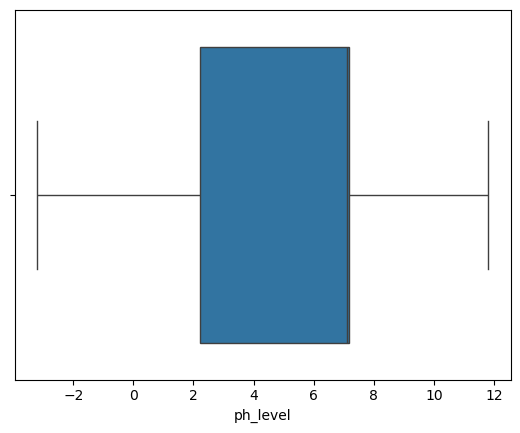

In [7]:
sns.boxplot(data=water_data, x= water_data.ph_level)

<Axes: xlabel='ppm'>

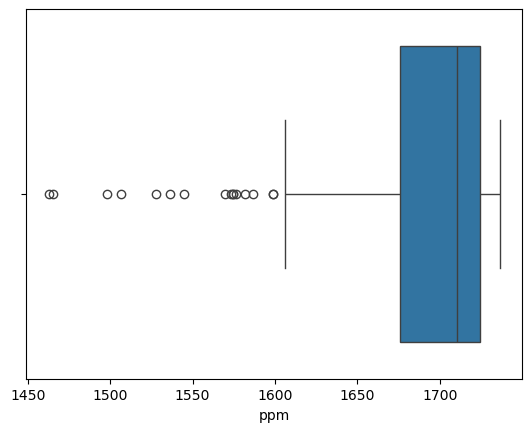

In [8]:
sns.boxplot(data=water_data, x= water_data.ppm)

<Axes: xlabel='O_percent'>

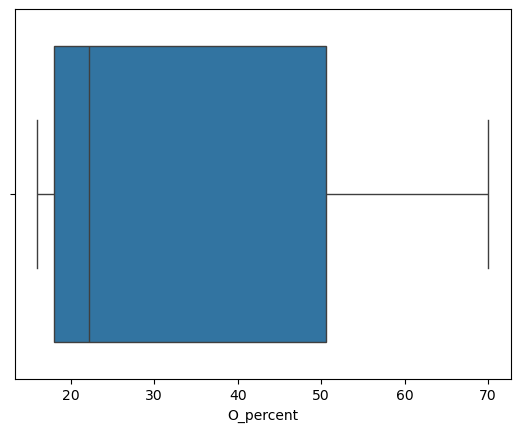

In [9]:
sns.boxplot(data=water_data, x= water_data.O_percent)

<Axes: xlabel='degreeC'>

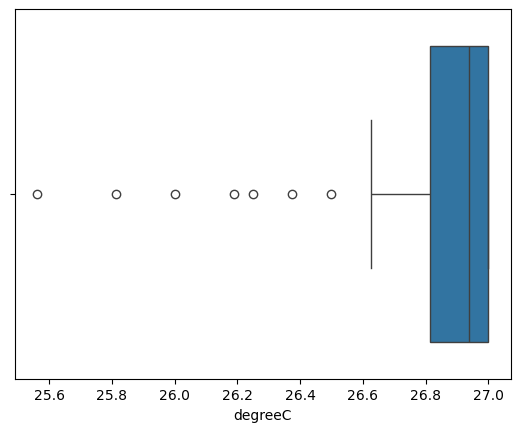

In [10]:
sns.boxplot(data=water_data, x= water_data.degreeC)

<Axes: xlabel='degreeC', ylabel='ppm'>

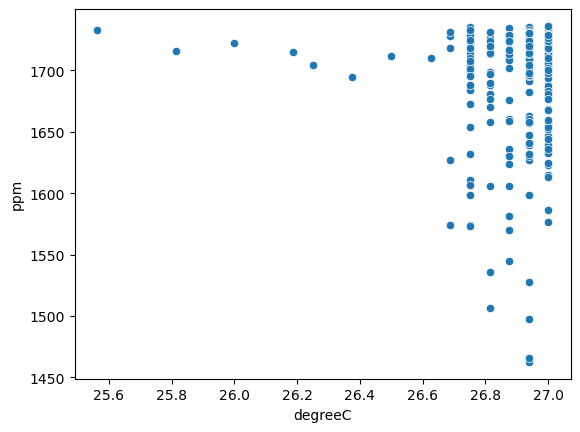

In [11]:
sns.scatterplot(data = water_data, x = water_data.degreeC, y= water_data.ppm)

<Axes: xlabel='degreeC', ylabel='ph_level'>

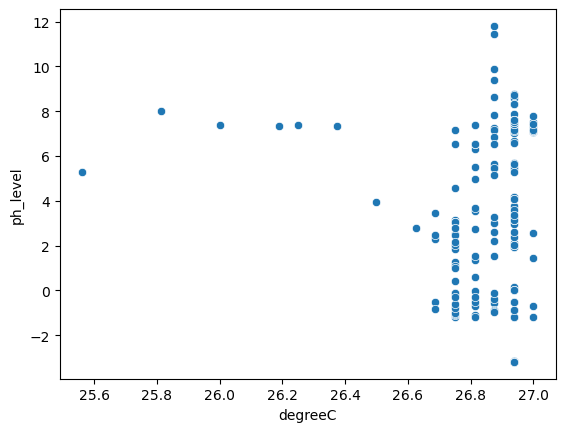

In [12]:
sns.scatterplot(data = water_data, x = water_data.degreeC, y= water_data.ph_level)

<Axes: xlabel='degreeC', ylabel='ppm'>

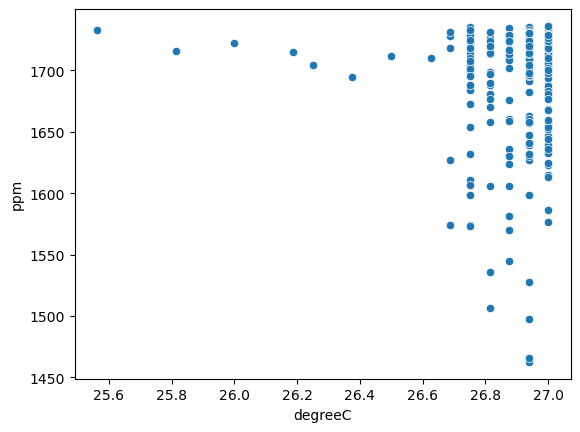

In [13]:
sns.scatterplot(data = water_data, x = water_data.degreeC, y= water_data.ppm)

<Axes: xlabel='degreeC', ylabel='O_percent'>

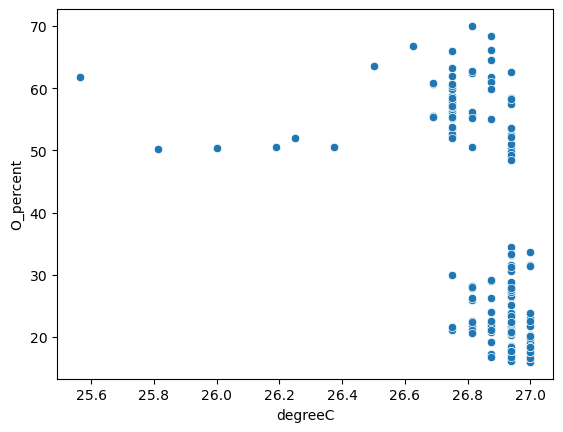

In [14]:
sns.scatterplot(data = water_data, x = water_data.degreeC, y= water_data.O_percent)

<Axes: xlabel='ppm', ylabel='ph_level'>

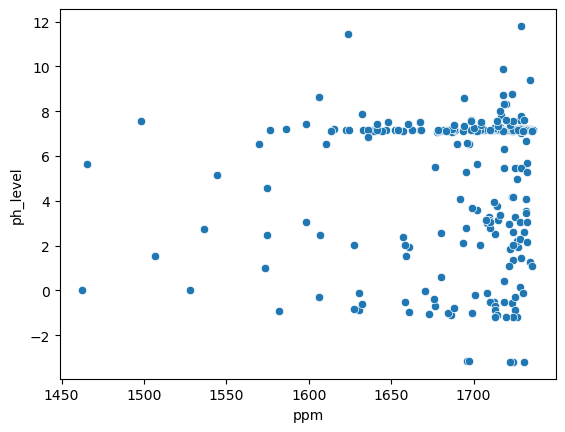

In [15]:
sns.scatterplot(data = water_data, x = water_data.ppm, y= water_data.ph_level)

<Axes: xlabel='O_percent', ylabel='ph_level'>

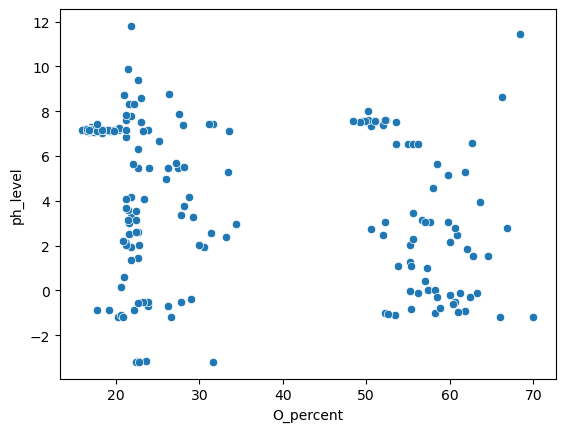

In [16]:
sns.scatterplot(data = water_data, x = water_data.O_percent, y= water_data.ph_level)

<Axes: xlabel='degreeC', ylabel='ph_level'>

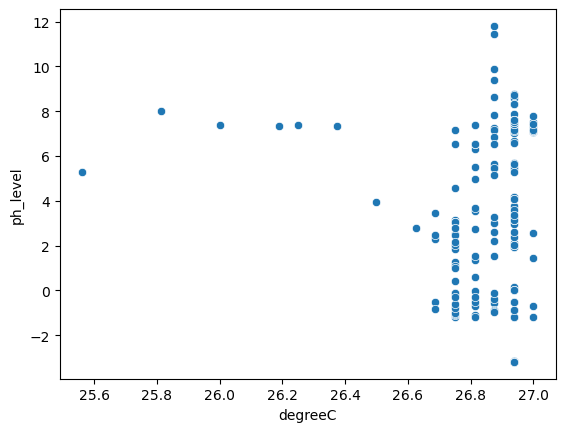

In [17]:
sns.scatterplot(data = water_data, x = water_data.degreeC, y= water_data.ph_level)

<Axes: xlabel='ppm', ylabel='O_percent'>

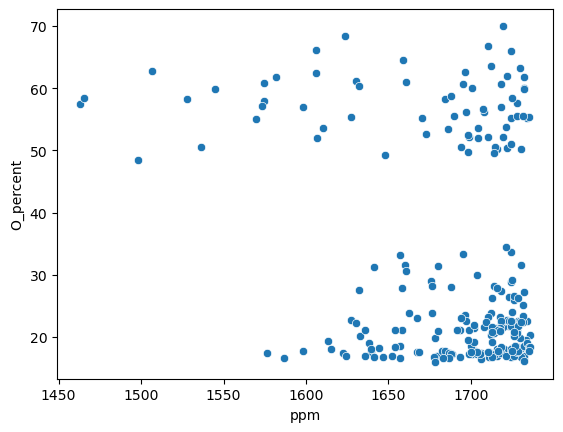

In [18]:
sns.scatterplot(data = water_data, x = water_data.ppm, y= water_data.O_percent)